In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
#df = pd.read_parquet("all_NLP_features.parquet")
#tones = pd.read_parquet("word_tone.parquet")

# list of files in '../../../Data/All_Data/All_Data_with_NLP_Features'
file_list = [f for f in os.listdir(r'../../../Data/All_Data/All_Data_with_NLP_Features') if f.endswith('.parquet')]
# read in all parquet files
df = pd.concat([pd.read_parquet(r'../../../Data/All_Data/All_Data_with_NLP_Features/' + f) for f in file_list])

transcripts = df["transcript"]

In [26]:
df[df["ticker"] == "AAPL"].loc[:, "Altman_Z":].iloc[0]

Altman_Z              4.324703
filingDate          2014-07-23
currentRatio          1.470598
quickRatio            0.000609
cashRatio             0.280857
                       ...    
AP                     2.66129
OU                    2.778626
tone                  3.188264
num_q_by_len          0.003822
train_test_80_20         train
Name: 0, Length: 72, dtype: object

In [27]:
# Get Finbert positivity score
# Combine finbert data
# finbert_list = ['pos_result_0_500.txt',
#                 'pos_result_500_1000.txt',
#                 'pos_result_1000_1200.txt',
#                  'pos_result_1200_1400.txt',
#                  'pos_result_1400_1500.txt',
#                  'pos_result_1500_2000.txt',
#                  'pos_result_2000_2500.txt',
#                  'pos_result_2500_3000.txt',
#                  'pos_result_3000_3500.txt',
#                  'pos_result_3500_4000.txt',
#                  'pos_result_4000_4500.txt',
#                  'pos_result_4500_5000.txt',
#                  'pos_result_5000_5300.txt',
#                  'pos_result_5300_5679.txt']

# pos_score_fin = np.array([])

# for filename in finbert_list:
#     temp = np.loadtxt(filename)
#     pos_score_fin = np.concatenate((pos_score_fin, temp))
    
# print("Bad call index: ", np.where(pos_score_fin == -1))

# # Replace pos_score of bad call with harvard pos_score 
# pos_harvard = df["pos_score"].iloc[1154]
# pos_score_fin[1154] = pos_harvard

# df["pos_score_finbert"] = pos_score_fin

In [28]:
#df = df.drop(['transcript_tokens', 'transcript_words'], axis=1)
bar_order = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']
# Assign values of Rating to this ordering
df['Rating'] = pd.Categorical(df['Rating'], categories=bar_order, ordered=True)

In [29]:
# df = df.rename(columns={"TONE1": "tone"})

# df = df.reset_index()
# # Check tone outlier
# idx = df['tone'].idxmax()

# # Retrieve the row
# max_row = df.loc[idx]
# #print(df.loc[idx]['transcript'])

# # Remove tone outlier
# df = df.drop(labels=idx)

In [30]:
# Check num_questions=0
idx = df[df['num_questions']==0].index


texts = df.loc[idx, 'transcript']
#print(df.loc[6845, 'transcript'])    

# From manual inspection
idx_bad_transcripts = [2539, 1631, 3349]   

# Drop bad transcripts? - decided not to

In [31]:
#sample = df.loc[1845]['transcript']
#print(sample)
#sample.count("?")


In [32]:
## Get num_question / call length

In [33]:
# df['num_q_by_len'] = df['num_questions']/df['word_count']
# df['len_by_q_count'] = df['word_count']/df['num_questions']
# inf values in len_by_q_count as q_count=0 for calls w/out Q&A sess
#df.describe()

In [34]:
# df.drop("index", axis=1).to_parquet("All_Data_with_NLP_Finbert.parquet")

In [35]:
df.columns[-20:]

Index(['pos_score_finbert', 'num_transparency', 'gf_score', 'word_count',
       'num_questions', 'Positiv', 'Negativ', 'Strong', 'Weak', 'Active',
       'Passive', 'Ovrst', 'Undrst', 'PN', 'SW', 'AP', 'OU', 'tone',
       'num_q_by_len', 'train_test_80_20'],
      dtype='object')

In [36]:
# Get NLP and call info columns
df_nlp = df.loc[:, "pos_score_finbert":"num_q_by_len"]
df_other = df.loc[:, "ticker":"rating_date"]

df = pd.concat([df_other, df_nlp], axis=1)
df.head(5)

,ticker,fixed_quarter_date,earnings_call_date,Rating,rating_date,pos_score_finbert,num_transparency,gf_score,word_count,num_questions,...,Active,Passive,Ovrst,Undrst,PN,SW,AP,OU,tone,num_q_by_len
0,AAPL,2014-10-01,2014-07-22,AA,2014-05-27,0.765917,0.10,12.781526,7587.0,29.0,...,495.0,186.0,364.0,131.0,5.518519,15.261905,2.661290,2.778626,3.188264,0.003822
1,AAPL,2015-01-01,2014-10-20,AA,2014-05-27,0.731819,0.12,12.537288,9399.0,26.0,...,656.0,199.0,465.0,152.0,5.348485,15.934783,3.296482,3.059211,3.681858,0.002766
2,AAPL,2015-04-01,2015-01-27,AA,2015-02-18,0.690750,0.11,11.759278,9075.0,42.0,...,591.0,208.0,468.0,151.0,3.927711,8.113636,2.841346,3.099338,1.307366,0.004628
3,AAPL,2015-07-01,2015-04-27,AA,2015-06-02,0.822168,0.11,12.013334,8548.0,33.0,...,565.0,214.0,415.0,135.0,5.250000,9.142857,2.640187,3.074074,2.025933,0.003861
4,AAPL,2015-10-01,2015-07-21,AA,2015-08-25,0.808114,0.12,11.503044,8685.0,34.0,...,565.0,219.0,449.0,148.0,4.209877,10.442857,2.579909,3.033784,1.815531,0.003915


## Examples of extreme vals

In [37]:
def find_nlp_feature_examples(feature_list, feat_name):
    # Finding the max value
    max_value = df[feat_name].max()
    # Finding the index of the max value
    max_index = df[feat_name].idxmax()
    
    min_value = df[feat_name].min()
    min_index = df[feat_name].idxmin()

    sample_max = df.loc[max_index]['transcript']
    sample_min = df.loc[min_index]['transcript']
    print(f"{feat_name} max value: {max_value}")
    print(f"{feat_name} min value: {min_value}")
    #print(min_index)
    
    return sample_max, sample_min

In [38]:
df["transcript"] = transcripts
df = df.reset_index(drop=True)
sample_max, sample_min = find_nlp_feature_examples(df['tone'], 'tone')

tone max value: 10.334498051869348
tone min value: -2.912620748125866


In [39]:
# Readability examples
sample_max, sample_min = find_nlp_feature_examples(df['gf_score'], 'gf_score')
#print(sample_max)

gf_score max value: 19.285765847056172
gf_score min value: 8.551054692434002


In [40]:
# Get Q count per 1000 words for visuals
df["num_q_adjusted"] = df["num_questions"] / (df["word_count"]/1000)


## Example of one company

In [41]:
df[df["ticker"] == "AAPL"].iloc[0]

ticker                                                             AAPL
fixed_quarter_date                                           2014-10-01
earnings_call_date                                           2014-07-22
Rating                                                               AA
rating_date                                                  2014-05-27
pos_score_finbert                                              0.765917
num_transparency                                                    0.1
gf_score                                                      12.781526
word_count                                                       7587.0
num_questions                                                      29.0
Positiv                                                           298.0
Negativ                                                            54.0
Strong                                                            641.0
Weak                                                            

## Boxplot of all features

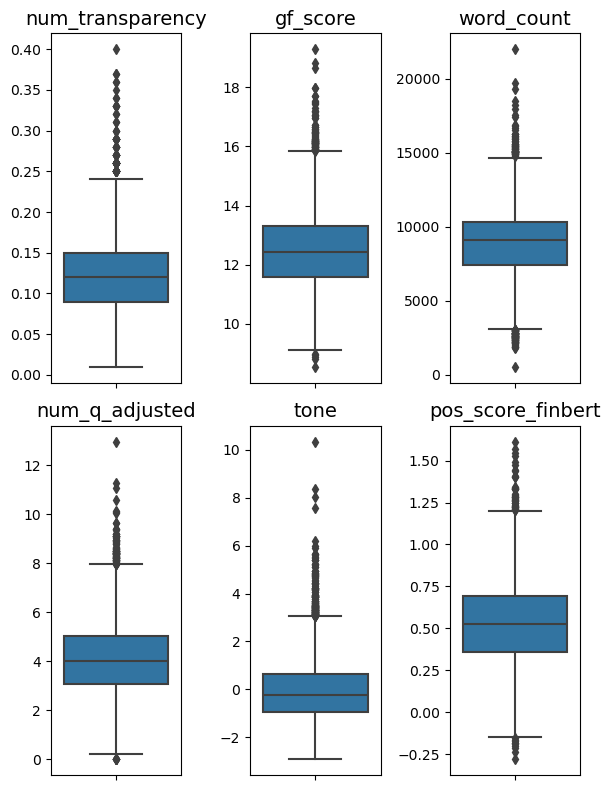

In [42]:
selected_columns = ['num_transparency', 'gf_score', 'word_count', 'num_q_adjusted', 'tone', 'pos_score_finbert']

df_box = df.loc[:, selected_columns]

fig, axes = plt.subplots(2, 3, figsize=(6, 8))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the grid for easy iteration

for i, col in enumerate(df_box.columns):
    sns.boxplot(y=df_box[col], ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel('')

# Hide any unused subplots if the number of plots is not a multiple of grid size
for ax in axes[len(df_box.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

output_path = "../../../Output/NLP"
fig.savefig(f'{output_path}/all_NLP_histogram.png')

c:\Users\ijyli\miniforge3\envs\capstone\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ijyli\miniforge3\envs\capstone\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ijyli\miniforge3\envs\capstone\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt t

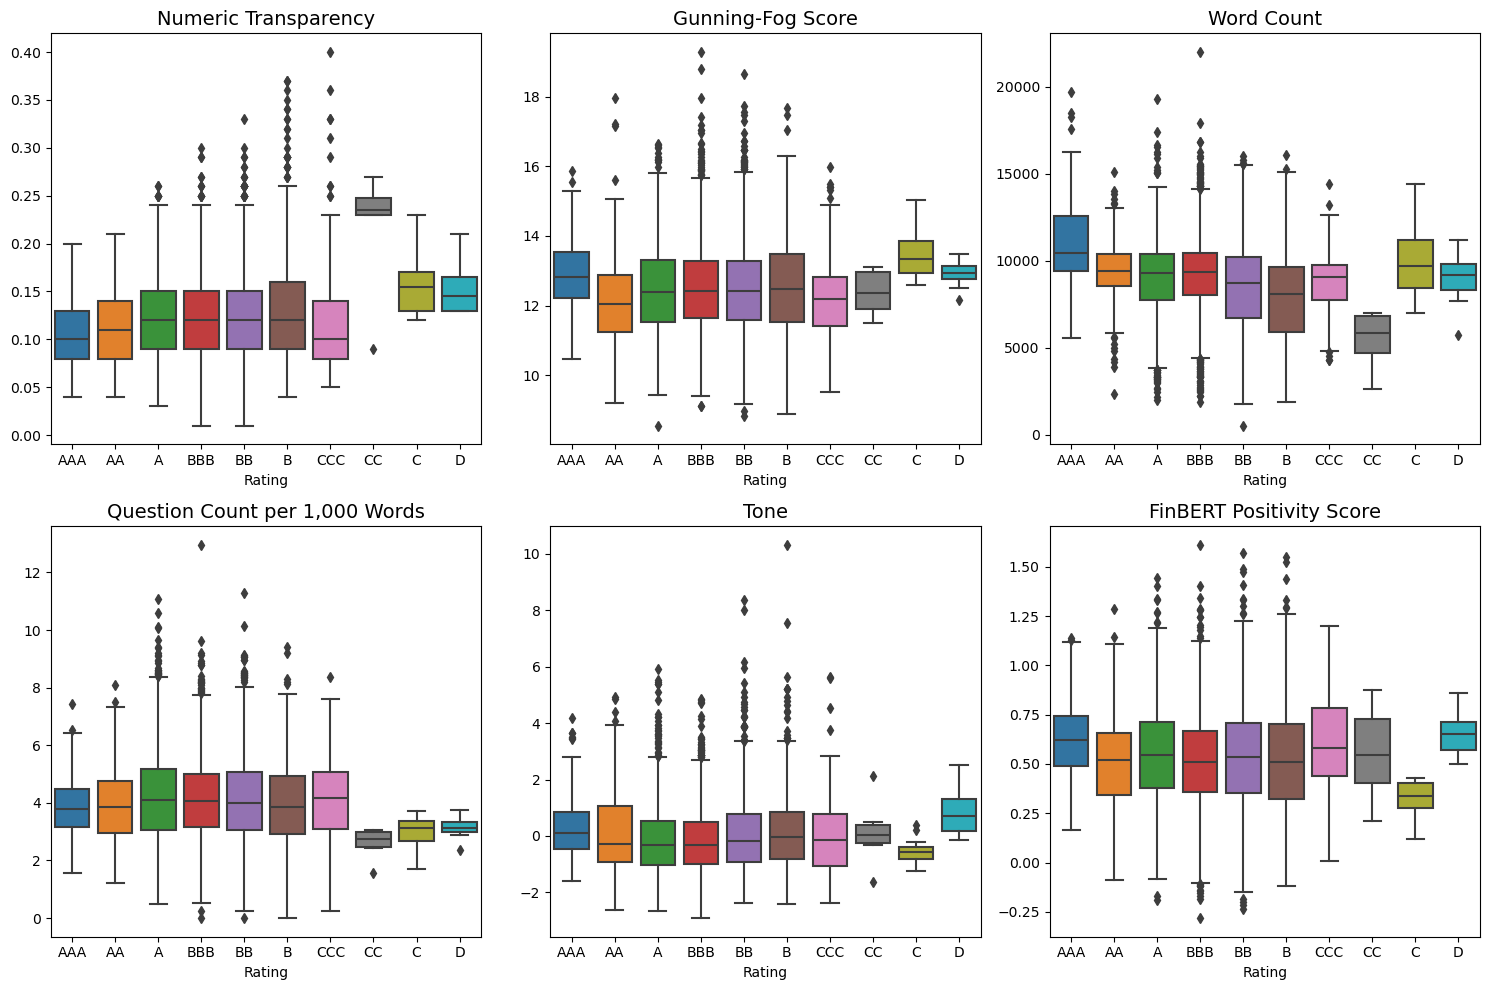

In [43]:
#df = df.drop('index', axis=1)
#num_columns = df.select_dtypes(include=[float, int]).columns
box_rating = df.loc[:, selected_columns]

# Determine the layout of the subplots (3 columns per row)
num_rows = int(len(selected_columns) / 3) + (len(selected_columns) % 3 > 0)

# Create subplots with the determined layout
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Iterate over the numerical columns to create a boxplot for each
boxplot_titles = ["Numeric Transparency", "Gunning-Fog Score", "Word Count", 
                 "Question Count per 1,000 Words", "Tone", "FinBERT Positivity Score"]
for i, col in enumerate(selected_columns):
    sns.boxplot(x='Rating', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{boxplot_titles[i]}', fontsize=14)
    # No y-title
    axes[i].set_ylabel('')

# Hide any unused subplots if the number of plots is not a multiple of grid size
for ax in axes[len(box_rating):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [44]:
fig.savefig(f'{output_path}/hist_by_rating.png')

## Corr plot

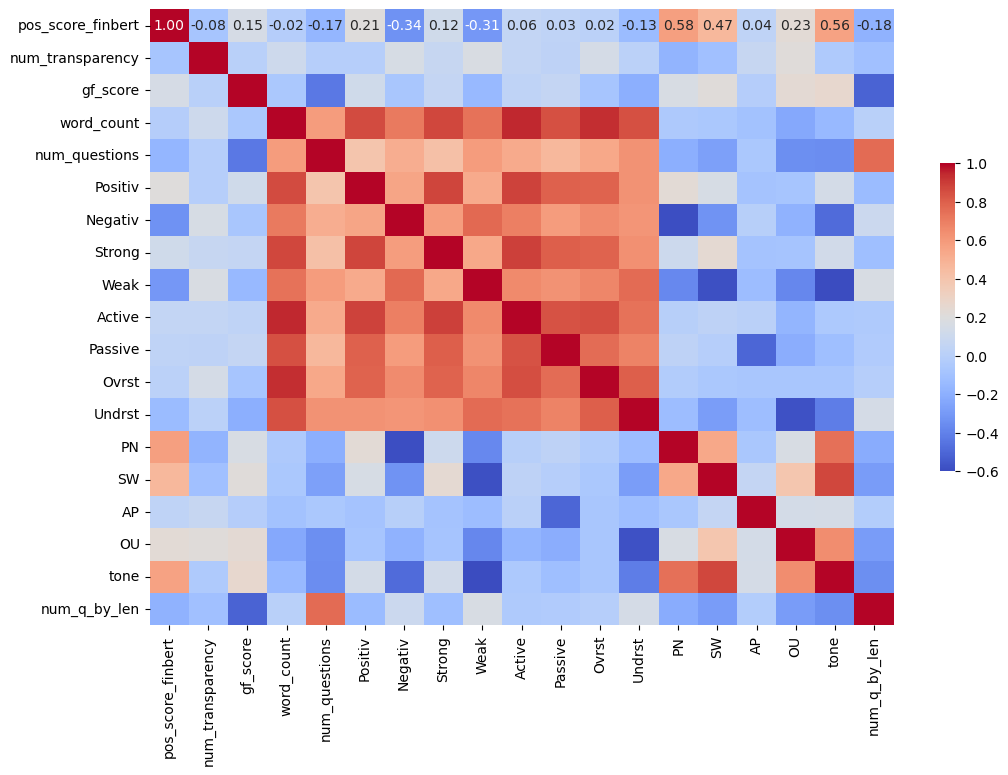

In [45]:
corr = df.loc[:, 'pos_score_finbert':'num_q_by_len'].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .5})
plt.savefig(f'{output_path}/corr_plot_nlp.png')

## Histogram for all (NOT USED)

KeyError: 'readability'

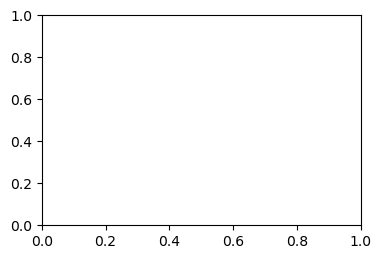

In [46]:
plt.figure(figsize=(14, 6))

# Boxplot for readability
plt.subplot(2, 3, 1)  # 1 row, 3 columns, first plot
plt.boxplot(df['readability'], patch_artist=True)
plt.title('Boxplot of Readability')
plt.xticks([1], ['Readability'])

# Boxplot for word_count
plt.subplot(2, 3, 2)  # 1 row, 3 columns, second plot
plt.boxplot(df['word_count'], patch_artist=True)
plt.title('Boxplot of Word Count')
plt.xticks([1], ['Word Count'])

plt.subplot(2, 3, 3)  # 1 row, 3 columns, third plot
plt.boxplot(df['num_transparency'], patch_artist=True)
plt.title('Boxplot of Numeric Transparency')
plt.xticks([1], ['Numeric Transparency'])

# Show the plot with tight layout
plt.tight_layout()
plt.show()

## Distribution of features by rating

/var/folders/5w/gsy5p7694w76q69v5jwrqgl40000gn/T/ipykernel_22442/1380085033.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_feature_values = df.groupby(['ticker', 'Rating'])['num_transparency'].mean().reset_index()


     ticker Rating  num_transparency
0      AAPL    AAA               NaN
1      AAPL     AA          0.111111
2      AAPL      A               NaN
3      AAPL    BBB               NaN
4      AAPL     BB               NaN
...     ...    ...               ...
4285    ZTS      B               NaN
4286    ZTS    CCC               NaN
4287    ZTS     CC               NaN
4288    ZTS      C               NaN
4289    ZTS      D               NaN

[4290 rows x 3 columns]


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

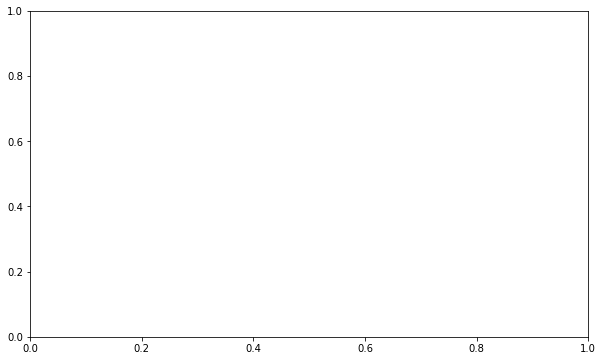

In [ ]:
mean_feature_values = df.groupby(['ticker', 'Rating'])['num_transparency'].mean().reset_index()

# Display the means for verification
print(mean_feature_values)

# Step 2: Plot histograms of mean FeatureValue for each CreditRating
# This will create a histogram for each unique CreditRating in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(data=mean_feature_values, x='num_transparency', hue='Rating', multiple='stack', bins=10, palette='viridis')
plt.title('Histogram of Numeric Transparency by Credit Rating')
plt.xlabel('Mean Feature Value')
plt.ylabel('Count')
plt.show()


In [ ]:
df_sec_rating = df.groupby(['Sector', 'Rating'])['num_transparency'].mean().reset_index()

/tmp/ipykernel_1677713/661820212.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sector_data['RatingNum'], sector_data['num_transparency'],


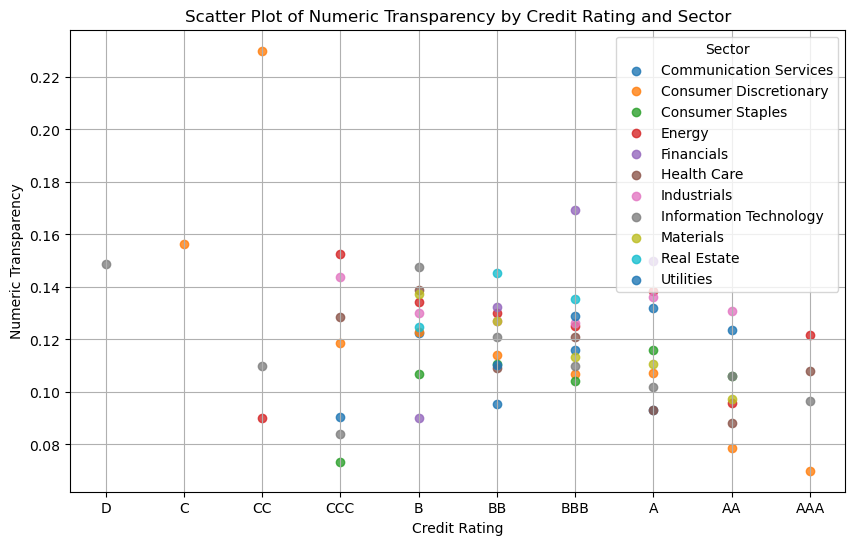

In [ ]:
# Map the ratings to a numerical value for plotting
ratings_order = ['D', 'C', 'CC', 'CCC', 'B', 'BB', 'BBB', 'A', 'AA', 'AAA']
df_sec_rating['RatingNum'] = df_sec_rating['Rating'].apply(lambda x: ratings_order.index(x))

# Let's define a colormap that maps each sector to a color.
sectors = df_sec_rating['Sector'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(sectors)))
color_map = dict(zip(sectors, colors))

# Now let's plot the scatter plot.
plt.figure(figsize=(10, 6))
for sector in sectors:
    # Select only rows of the current sector
    sector_data = df_sec_rating[df_sec_rating['Sector'] == sector]
    plt.scatter(sector_data['RatingNum'], sector_data['num_transparency'], 
                label=sector, alpha=0.8, cmap='viridis')

# Formatting the plot
plt.xticks(range(len(ratings_order)), ratings_order)
plt.xlabel('Credit Rating')
plt.ylabel('Numeric Transparency')
plt.title('Scatter Plot of Numeric Transparency by Credit Rating and Sector')
plt.legend(title='Sector')
plt.grid(True)
plt.show()


In [ ]:
#df.dropna(subset=['readability'])    # Drop 3 calls with wrong earning call

## Readability and Word Count

In [ ]:
gf_word_by_cred = df.groupby('Rating')[['gf_score', "word_count"]].mean().reset_index()
gf_word_by_cred

/var/folders/5w/gsy5p7694w76q69v5jwrqgl40000gn/T/ipykernel_22442/1011087664.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gf_word_by_cred = df.groupby('Rating')[['gf_score', "word_count"]].mean().reset_index()


,Rating,gf_score,word_count
0,AAA,12.847057,10970.991071
1,AA,12.119740,9443.888889
2,A,12.478562,9056.948127
3,BBB,12.535612,9259.573053
4,BB,12.512312,8433.507207
5,B,12.514762,7857.740548
6,CCC,12.310212,8702.590551
7,CC,12.373737,5474.666667
8,C,13.487426,9939.812500
9,D,12.913573,8899.375000


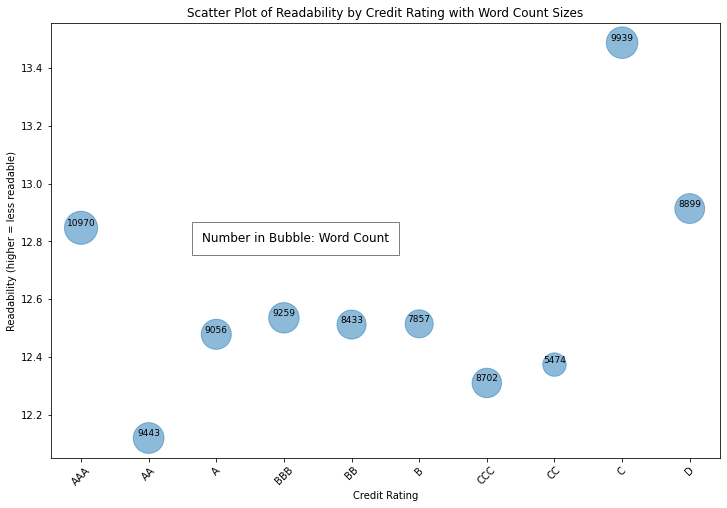

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter('Rating', 'gf_score', s=gf_word_by_cred['word_count']/10, alpha=0.5, data=gf_word_by_cred)

# Adding titles and labels
plt.xlabel('Credit Rating')
plt.ylabel('Readability (higher = less readable)')
plt.title('Scatter Plot of Readability by Credit Rating with Word Count Sizes')
plt.xticks(rotation=45)

for i, row in gf_word_by_cred.iterrows():
    plt.text(row['Rating'], row['gf_score'], f"{int(row['word_count'])}", fontsize=9,
             ha='center', va='bottom')
    
text = plt.text(0.3, 0.5, 'Number in Bubble: Word Count', fontsize=12, 
                bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
                transform=plt.gcf().transFigure)

plt.savefig(f'{output_path}/bubble.png')
# Show plot with legend for sizes
#plt.legend(*scatter.legend_elements("sizes", num=6), title="Word Count / 10")